## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja liniowa wieloraka

Rzadko kiedy zdarza się taka sytuacja, że zależność opisuje się na podstawie tylko jednej zmiennej. Z reguły na wynik zmiennej objaśnianej ($y$) ma wpły więcej różnych cech. Przykładowo, na cenę samochodu ma wpływ rok produkcji, przebieg, ilość koni mechanicznych itp. Dlatego właśnie jest naturalna potrzeba rozwinięcia algorytmu regresji liniowej z jedną cechą na większą ilość cech.

Algorytm, który implementowaliśmy w poprzednim zadaniu jest szczególnym przypadkiem regresji liniowej, ale może zostać on w łatwy sposób uogólniony. Mechanizmy, które poznaliśmy wcześniej takie jak obliczanie funkcji błędu, pochodnych cząstkowych, w dalszym ciągu są aktualne. Trzeba jedynie uwzględnić dodatkowe cechy.

### Zadanie 1

W zbiorze danych z zarobkami, który wykorzystywany był w poprzednim zadaniu, znajduje się pominięta wcześniej cecha. Wczytaj dane z pliku Salary.csv, tym razem z dwiema zmiennymi objaśniającymi: YearsExperience i Age oraz zmienną objaśnianą Salary. Stwórz wykres 3D przedstawiający dane.

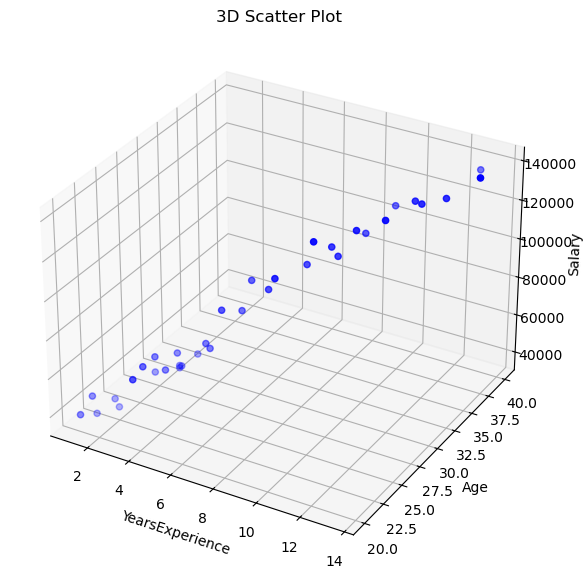

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Salary.csv', sep=',')

x = df["YearsExperience"]
y = df["Age"]
z = df["Salary"]

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='blue', marker='o')
ax.set_xlabel('YearsExperience')
ax.set_ylabel('Age')
ax.set_zlabel('Salary')
ax.set_title('3D Scatter Plot')

plt.show()

## Zadanie 2

Przerób algorytm znajdujący się w funkcji _learn_and_fit(x,y)_ w taki sposób, aby uwzględniał dodatkową cechę.
Funkcja regresji liniowej przybierze w tym momencie postać:

\begin{equation}
f(x^{(i)}) = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 = \beta_{0} + \beta_{1} YearsExperience + \beta_{2} Age
\end{equation}

Pojawienie się kolejnej cechy wymaga akutalizacji obliczania gradientu. Należy dodatkowo obliczyć pochodną cząstkową względem parametru $\beta_{2}$, a następnie zaktualizować wartość tego parametru. 

Obliczenie pochodnej cząstkowej wygląda analogicznie jak w przypadku parametru $\beta_{1}$.

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{2}} = \frac{1}{n} \sum^{n}_{i=1} (f(x^{(i)}) - y^{(i)})x_{1}^{(i)}
\end{equation}

Aktualizacja wartości współczynnika również jest analogiczna.

\begin{equation}
    \beta_{2} = \beta_{2} - \alpha \frac{\partial SSR}{\partial \beta_{2}} 
\end{equation}

_Uwaga: Zastanów się, w jaki sposób zaimplementować obługę kolejnych cech, tak aby po pojawieniu się 3 cechy nie trzeba było modyfikować algorytmu._

In [8]:
import random
from typing import Tuple, List

def initialize_coefficients(n: int = 2, alpha = None) -> Tuple[float, np.ndarray]:
    if alpha is None:
        alpha = random.random()

    return alpha, np.array([random.random() for _ in range(n+1)])


def calculate_regression_function(X: np.ndarray, betas: np.ndarray) -> np.ndarray:
    return X @ betas


def calculate_error(predictions: np.ndarray, y: np.ndarray, betas: np.ndarray) -> float:
    m = y.shape[0]
    return (np.sum((predictions - y)**2))/(2*m)


def calculate_gradient(predictions: np.ndarray, X: np.ndarray, y: np.ndarray, betas: np.ndarray) -> np.ndarray:
    m = y.shape[0]
    diff = predictions - y
    return (X.T @ diff)/m

def update_regression_coefficients(X: np.ndarray, y: np.ndarray, betas: np.ndarray, alpha: float) -> np.ndarray:
    gradients = calculate_gradient(
        calculate_regression_function(X,betas),
        X,
        y,
        betas)

    return betas - alpha * gradients

In [10]:
'''
input:
X - wartości zmiennych objaśniających YearsExperience oraz Age dla wszystkich obserwacji
y - wartości zmiennej objaśnianej Salary dla wszystkich obserwacji

output:
b0: [] - lista z współczynnikami beta_0 w każdej z epok
betas: [] - lista z współczynnikami beta_1, beta_2 w każdej z epok
error: [] - lista z błędem w każdej epoce
'''
def learn_and_fit(X: np.ndarray, y: np.ndarray, alpha=0.1, epochs=100) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    # Add a column of ones for the bias (beta_0)
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    X = (X - np.mean(X)) / np.std(X)
    y = (y - np.mean(y)) / np.std(y)

    errors = []
    b0 = []
    betas = []

    alpha , betas_values = initialize_coefficients(n=X.shape[1] ,alpha=alpha)

    for i in range(epochs) :
        predictions = calculate_regression_function(X, betas_values)
        error = calculate_error(predictions, y, betas_values)
        errors.append(error)
        betas_temp = update_regression_coefficients(X, y, betas_values, alpha)
        b0.append(betas[0].copy())
        betas.append(betas_temp[1:].copy())

        if error < 0.05:
            return np.array(b0), np.array(betas), np.array(errors)

    return np.array(b0), np.array(betas), np.array(errors)

In [13]:
df = pd.read_csv('Salary.csv', sep=',')

xx = df[["YearsExperience", "Age"]]
y = df["Salary"]

b0s, all_betas, errors = learn_and_fit(xx, y, alpha=0.01, epochs=200)


ValueError: operands could not be broadcast together with shapes (35,) (35,3) 

### Zadanie 3

Do stworzonego z zadaniu 1 wykresu dodaj płaszczyznę regresji. Stwórz 3 wykresy przedstawiające jak zmieniała się funkcja regresji na przestrzeni epok (pierwsza, środkowa, ostatnia epoka).

In [ ]:
#YOUR CODE HERE

### Zadanie 4

W sytuacji, w której zbiór danych zawiera więcej zmiennych objaśniających niż 2, niemożliwym staje się wizualizacja prostej regresji i ocena w taki sposób stworzonego modelu. Bardzo przydatnym rozwiązaniem jest wtedy stworzenie wykresu błędów regresji. Jeśli wartości błędu spadają wraz z kolejnymi epokami, oznacza to, że jesteśmy na dobrej drodze, a nasz algorytm działa poprawnie. Celem tego zadania będzie stworzenie finalnego modelu regresji liniowej, który będzie przyjmował dowolną liczbę zmiennych objaśniających.

Na podstawie wcześniejszych implementacji, stwórz implementację funkcji *learn_and_fit_multi(X, y)*, która będzie przyjmować zbiór wejściowy z dowolną ilością kolum (cech). Dla takiego zbioru zbioru danych ma zostać stworzony model regresji. Funkcja podobnie jak wcześniej, ma zwracać współczynniki oraz wartość błędu w każdej epoce. 

W notebooku z opisem regresji liniowej przedstawione zostały wzory na ogólą postać regresji. Przeanalizuj je jeszcze raz i postaraj się je zaimplementować.

Wczytaj zestaw danych *multi_variable_regression.csv* z katalogu datasets. Dane wygenerowane zostały w taki sposób, że są wysoce liniowo zależne. Wartość błędu dla nauczonego modelu powinna być w takim przypadku niewielka. Przetestuj na wczytanym zbiorze swój algorytm.

In [ ]:
#YOUR CODE HERE

### Zadanie 5

Stwórz wykres przedstawiający zmianę błędu regresji w kolejnych epokach. Napisz co można na jego podstawie wywnioskować.

In [ ]:
#YOUR CODE HERE

### Zadanie 6

W jaki sposób współczynnik alpha wpływa na działania algorytmu? Przeprowadź eksperyment dla minimum trzech różnych wartości tego parametru. Sformułuj wnioski. Jak zmiana parametru wpłynęła na ilość epok w algorytmie? Jak zmieniła się funkcja regresji?

In [ ]:
# YOUR CODE HERE

### Zadanie 7

Porównaj czas działania algorytmu we własnej implementacji oraz implementacji z biblioteki Sklearn.

In [ ]:
# YOUR CODE HERE